In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
sns.plotting_context(context='paper')
sns.set_palette('rainbow')

import pandas as pd

In [134]:
sales = pd.read_csv('../../../data/mckinsey/sales.csv', index_col='ID')

skus = pd.read_csv('../../../data/mckinsey/sku.csv', index_col='SKU')

sales = sales.join(skus, on='SKU')

In [135]:
sales.columns

Index(['geoCluster', 'SKU', 'date', 'price', 'sales', 'Category', 'Type',
       'brandId', 'lagerUnitQuantity', 'Units', 'trademark', 'countryOfOrigin',
       'Group'],
      dtype='object')

#### Clean dataset

In [136]:
sales_raw = sales.copy()

sales['date'] = pd.to_datetime(sales['date'])
sales = sales.loc[sales['date'] > '2020-04-01']
sales['sales'] = sales['sales'].fillna(1)

In [137]:
sales.describe()

,geoCluster,SKU,price,sales,brandId,lagerUnitQuantity,Units,trademark,countryOfOrigin
count,4.605238e+06,4.605238e+06,778361.000000,4.605238e+06,2.614647e+06,4.605238e+06,0.0,3.547617e+06,2.275995e+06
mean,2.219991e+03,3.671248e+05,67.490814,1.438388e+00,3.663741e+03,1.156733e+02,NaN,6.290517e+03,7.332296e+00
std,2.458815e+02,3.005083e+05,85.631855,2.136269e+00,2.625976e+03,1.602863e+02,NaN,4.434512e+03,1.009475e+01
min,9.200000e+01,2.400000e+01,0.000000,1.000000e-03,9.670000e+02,5.000000e-01,NaN,2.970000e+02,1.000000e+00
25%,2.049000e+03,3.946500e+04,24.190000,1.000000e+00,1.330000e+03,1.000000e+00,NaN,1.921000e+03,1.000000e+00
50%,2.158000e+03,3.637130e+05,38.490000,1.000000e+00,2.737000e+03,1.500000e+00,NaN,5.070000e+03,1.000000e+00
75%,2.269000e+03,6.427000e+05,61.890000,1.000000e+00,7.358000e+03,3.000000e+02,NaN,9.666000e+03,1.400000e+01
max,3.230000e+03,8.381370e+05,7246.890000,8.010000e+02,8.314000e+03,5.500000e+02,NaN,1.515600e+04,3.700000e+01


In [152]:
sales.nunique()

geoCluster            446
SKU                    60
date                  460
price                1967
sales                 840
Category               39
Type                   38
brandId                14
lagerUnitQuantity      20
Units                   0
trademark              23
countryOfOrigin         6
Group                   5
dtype: int64

In [138]:
start_date = sales['date'].min()
end_date = sales['date'].max()
time_range = pd.date_range(start_date, end_date)

#### Number of observations per date

<AxesSubplot:>

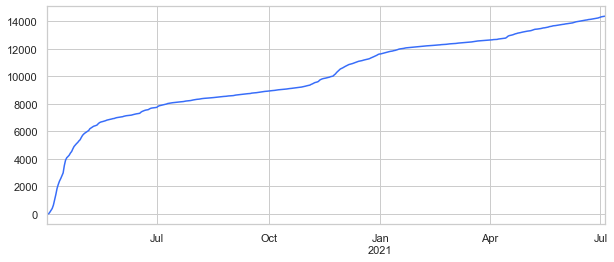

In [139]:
fig, ax = plt.subplots(figsize=(10, 4))
number_of_observations_per_date = sales.groupby('date').count()['SKU'].reindex(time_range, fill_value=0)
number_of_observations_per_date.plot(ax=ax)

In [140]:
number_of_observations_per_date.describe()

count      460.000000
mean     10011.386957
std       2974.467301
min         13.000000
25%       8204.000000
50%       9876.000000
75%      12450.000000
max      14361.000000
Name: SKU, dtype: float64

#### Portion of NaN values per column

In [141]:
sales.isna().sum() / sales.shape[0]

geoCluster           0.000000
SKU                  0.000000
date                 0.000000
price                0.830984
sales                0.000000
Category             0.105129
Type                 0.105129
brandId              0.432245
lagerUnitQuantity    0.000000
Units                1.000000
trademark            0.229656
countryOfOrigin      0.505781
Group                0.000000
dtype: float64

#### Number of observations per SKU

<AxesSubplot:xlabel='SKU'>

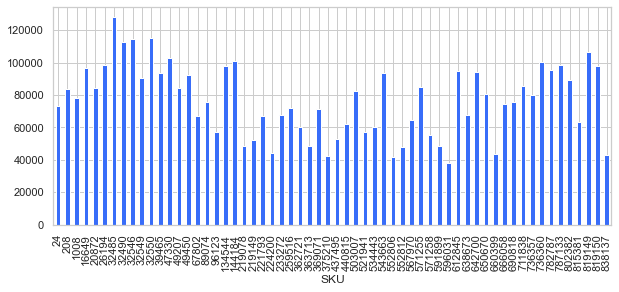

In [142]:
fig, ax = plt.subplots(figsize=(10, 4))

sales.groupby('SKU')['date'].count().plot(ax=ax, kind='bar')

#### Number of observations per SKU per day

In [151]:
sales.groupby(['SKU', 'date'])['Group'].count().unstack(level=0).fillna(0).describe()

SKU,24,208,1008,16649,20872,26194,32485,32490,32546,32549,...,711838,736357,736360,782787,787133,802382,815381,819149,819150,838137
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,...,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,159.539130,182.656522,169.654348,210.847826,183.463043,213.884783,278.232609,244.873913,248.915217,197.015217,...,185.730435,174.193478,218.328261,207.208696,214.608696,193.802174,137.741304,231.884783,212.945652,93.776087
std,78.015086,63.445750,61.638380,60.293388,58.080261,50.537436,40.118346,38.305352,47.297549,64.531003,...,42.157361,55.848140,49.311765,50.120464,47.191945,57.860041,126.236544,49.814053,49.901376,93.549189
min,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,81.000000,141.000000,128.000000,183.000000,143.000000,201.000000,259.000000,237.000000,237.000000,160.000000,...,164.000000,142.000000,203.000000,195.000000,197.000000,177.000000,14.750000,226.000000,201.000000,1.000000
50%,183.000000,170.000000,154.000000,212.000000,174.500000,227.500000,264.500000,242.500000,245.000000,197.500000,...,189.000000,164.000000,224.000000,209.000000,215.000000,201.000000,216.500000,238.000000,214.000000,55.500000
75%,240.000000,229.000000,224.250000,248.000000,228.250000,244.000000,278.000000,255.000000,266.250000,247.000000,...,215.000000,218.000000,251.000000,237.000000,250.000000,235.000000,264.000000,251.000000,242.000000,200.000000
max,246.000000,291.000000,257.000000,316.000000,278.000000,259.000000,384.000000,308.000000,331.000000,290.000000,...,238.000000,264.000000,283.000000,274.000000,265.000000,274.000000,269.000000,294.000000,276.000000,221.000000


#### Number of summed sales per day and group

<AxesSubplot:xlabel='date'>

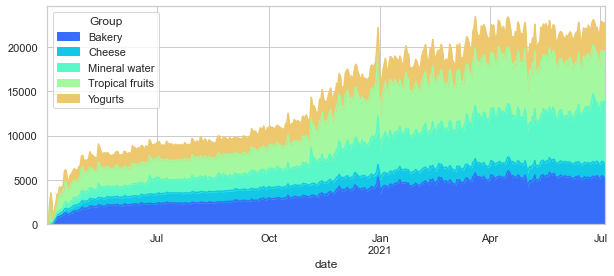

In [143]:
fig, ax = plt.subplots(figsize=(10, 4))

sales.groupby(['date', 'Group']).sum()['sales'].unstack().plot(ax=ax, kind='area', stacked=True)